In [2]:
import pandas as pd

In [15]:
dir_path = "../../data/ml-latest-small"
movies = pd.read_csv(f"{dir_path}/movies.csv")
ratings = pd.read_csv(f"{dir_path}/ratings.csv")
tags = pd.read_csv(f"{dir_path}/tags.csv")

print(f"movies: {len(movies)}")
print(f"ratings: {len(ratings)}")
print(f"tags: {len(tags)}")

movies: 9742
ratings: 100836
tags: 3683


In [8]:
(tags
    .groupby("tag").count()
    .drop(columns = ["userId", "timestamp"])
    .query("tag == 'time travel'")
)

,movieId
tag,
time travel,16


['atmospheric', 'thought-provoking', 'hallucinatory', 'sci-fi', 'dreamlike', 'comedy', 'cult film', 'classic']


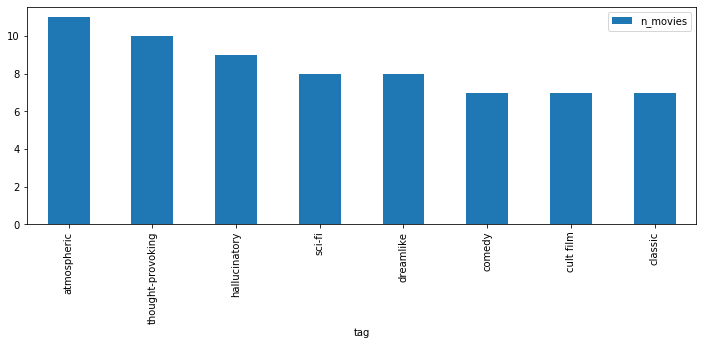

In [61]:
focus = ["space", "surreal", "funny"]
has_focus_tag = tags[tags.tag.isin(focus)].movieId

output = (tags
    [(tags.movieId.isin(has_focus_tag)) & ~(tags.tag.isin(focus))]
    .drop(columns = ["timestamp", "userId"])
    .groupby("tag").count()
    .rename(columns = {"movieId":"n_movies"})
    .sort_values("n_movies", ascending = False)
    .head(8)
)

print(list(output.index))
output.plot.bar(y = "n_movies", figsize = (12,4))